In [1]:
import pandas as pd
import folium
from geopy import distance
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from libpysal import weights, examples
from libpysal.cg import voronoi_frames
from contextily import add_basemap
import networkx as nx
import numpy as np
import geopandas

In [2]:
#street_map = gpd.read_file(r'C:\Users\marco\Downloads\SimplifiedStreetSegmentQrt.shp')
df = pd.read_csv(r"C:\Users\marco\Downloads\Electric_Vehicle_Charging_Stations_in_New_York.csv")

In [3]:
df = df.drop(['Fuel Type Code', 'Intersection Directions','Station Phone','Status Code','Owner Type Code',
         'Federal Agency ID','Federal Agency Name','Cards Accepted',
         'EV Network Web','ZIP','Groups With Access Code','Expected Date','Access Days Time',
         'Geocode Status','Updated At','Plus4'], axis=1)

Vengono eliminate le colonne che non presentano dati utili all'analisi o che presentano dei NaN in ogni osservazione.

In [38]:
df.index.names = ['Index']
df.head()

,Station Name,Street Address,City,State,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,Latitude,Longitude,Date Last Confirmed,ID,Open Date,EV Connector Types
Index,,,,,,,,,,,,,,,
0,ShopRite Plaza,2333 Nott St E,Niskayuna,NY,NaN,2.0,NaN,NaN,Non-Networked,42.816614,-73.889657,05/06/2021,50854,04/20/2021,J1772
1,GMC Copley Parking - Tesla Destination,2000 Broadway,New York,NY,NaN,3.0,NaN,NaN,Tesla Destination,40.775496,-73.981552,11/03/2020,115044,09/01/2017,TESLA
2,WHITE PLAINS EVSE1,1 Maple Ave,White Plains,NY,NaN,2.0,NaN,NaN,ChargePoint Network,41.028410,-73.759380,12/28/2022,197206,10/07/2021,J1772
3,3500 Dekalb Ave,3500 Dekalb Ave,Bronx,NY,NaN,2.0,NaN,NaN,FLO,40.882337,-73.880265,12/28/2022,201636,11/25/2021,J1772
4,134 N 4th St,134 N 4th St,Brooklyn,NY,NaN,4.0,NaN,NaN,FLO,40.716441,-73.960043,12/28/2022,202931,12/22/2021,J1772


In [39]:
location = df[["Latitude", "Longitude", "Station Name"]]

In [40]:
map = folium.Map(location=[location.Latitude.mean(), location.Longitude.mean()], zoom_start=8, control_scale=True)

In [41]:
for index, location_info in location.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Station Name"]).add_to(map)

In [42]:
# map

In [47]:
for i in range(0, (df.shape[0]+1)):
    df["Distance"]= (distance.distance((df['Latitude'][i],df['Longitude'][i]),
                                            (df['Latitude'][i+1],df['Longitude'][i+1])).miles, axis=1)
#     i+=i+1

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (993550196.py, line 3)

In [29]:
G = nx.Graph()
for i in range(1, (df.shape[0])):
        G.add_node(i, pos=(df["Longitude"][i], df["Latitude"][i]))

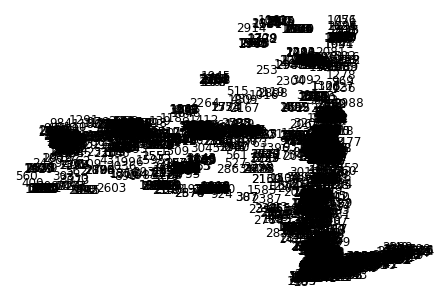

In [31]:
nx.draw(G, nx.get_node_attributes(G, 'pos'),with_labels=True, node_size=10000, node_color="w")
plt.show()